In [4]:
def concave(points,alpha_x=150,alpha_y=250):
    points = [(i[0],i[1]) if type(i) <> tuple else i for i in points]
    de = Delaunay(points)
    dec = []
    a = alpha_x
    b = alpha_y
    for i in de.simplices:
        tmp = []
        j = [points[c] for c in i]
        if abs(j[0][1] - j[1][1])>a or abs(j[1][1]-j[2][1])>a or abs(j[0][1]-j[2][1])>a or abs(j[0][0]-j[1][0])>b or abs(j[1][0]-j[2][0])>b or abs(j[0][0]-j[2][0])>b:
            continue
        for c in i:
            tmp.append(points[c])
        dec.append(tmp)
    G = nx.Graph()
    for i in dec:
            G.add_edge(i[0], i[1])
            G.add_edge(i[0], i[2])
            G.add_edge(i[1], i[2])
    ret = []
    for graph in nx.connected_component_subgraphs(G):
        ch = ConvexHull(graph.nodes())
        tmp = []
        for i in ch.simplices:
            tmp.append(graph.nodes()[i[0]])
            tmp.append(graph.nodes()[i[1]])
        ret.append(tmp)
    return ret  

In [3]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.spatial import Delaunay, ConvexHull
import networkx as nx

/home/aditya/anaconda2/lib/python2.7/site-packages/matplotlib/style/core.py:201: UserWarning: In /home/aditya/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/presentation.mplstyle: Duplicate key in file "/home/aditya/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/presentation.mplstyle", line #14
  warnings.warn(message)


In [8]:
xl = 2.0
yl = 1.0
N = 1000
t = 3
ini_condns = np.array([np.random.uniform(-xl,xl,N),np.random.uniform(-yl,yl,N)]).T
ini_condns =  np.concatenate((ini_condns,np.array([[-xl,yl],[-xl,-yl],[xl,yl],[xl,-yl]])),axis=0)
ini_condns_arr = ini_condns.flatten()

In [9]:
def fun(t, y):
    res = np.zeros(len(y))
    for i in range(len(y)):
        if i % 2 == 0:
            res[i] = y[i+1]
        else:
            res[i] = - y[i-1]
    return res

def fun_d(t, y):
    res = np.zeros(len(y))
    for i in range(len(y)):
        if i % 2 == 0:
            res[i] = y[i+1]
        else:
            res[i] = - y[i-1] - y[i-1] ** 3
    return res

def PolyArea2D(pts):
    lines = np.hstack([pts,np.roll(pts,-1,axis=0)])
    area = 0.5*abs(sum(x1*y2-x2*y1 for x1,y1,x2,y2 in lines))
    return area


In [11]:
soln = solve_ivp(fun_d, [0,t], ini_condns_arr,t_eval= t/10.*np.linspace(0,8,5))

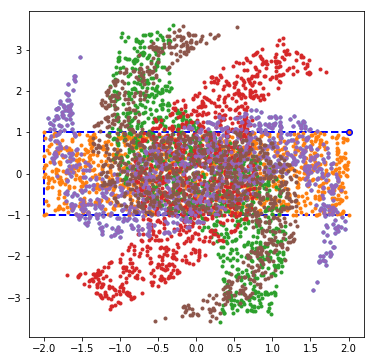

In [13]:
plt.figure(figsize=(6,6))
points = ini_condns
#plt.plot(ini_condns[:,0],ini_condns[:,1], '.')
hull = ConvexHull(ini_condns)
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'b--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'bo')
#print(PolyArea2D(points[hull.vertices]))
#print(hull.area)

points_temp =np.reshape(soln.y.T[3], newshape=(len(ini_condns/2), 2))
plt.plot(points_temp[:,0],points_temp[:,1],'.')
for sol in soln.y.T:
    points_1 = np.reshape(sol, newshape=(len(ini_condns/2), 2))
    #plt.plot(points_1[:,0],points_1[:,1],'.')
    plt.plot(points_1[:,0],points_1[:,1],'.')
    #hull_1 = ConvexHull(points_1)
    #xcoords = np.append(points_1[hull_1.vertices,0],points_1[hull_1.vertices[0],0])
    #ycoords = np.append(points_1[hull_1.vertices,1],points_1[hull_1.vertices[0],1])
    #plt.plot(xcoords, ycoords, '--', lw=2)
    #plt.plot(points_1[hull_1.vertices[0],0], points_1[hull_1.vertices[0],1], 'ro')
    #print(PolyArea2D(points_1[hull_1.vertices]))
    #print(PolyArea2D(points_1[hull_1.vertices]))
